In [469]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2_score
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt 


%matplotlib inline


In [470]:
TEST_origin = './test.csv'
TRAIN_origin = './train.csv'

In [471]:
train_df = pd.read_csv(TRAIN_origin)
test_df = pd.read_csv(TEST_origin) 
train_df.tail(3)


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [472]:
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [473]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [474]:
corr_matrix = train_df.corr().round(2)
corr_matrix

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.00,0.01,-0.01,-0.01,0.02,0.02,0.00,-0.01,0.01,0.02,-0.00,-0.00,-0.01,-0.00,0.00,-0.01,0.01
DistrictId,0.01,1.00,0.07,-0.03,-0.02,0.04,-0.12,-0.15,0.01,0.07,0.25,0.17,0.14,0.30,0.31,0.17,0.27
Rooms,-0.01,0.07,1.00,0.66,0.13,0.01,-0.00,-0.03,-0.01,-0.03,0.08,0.07,0.01,0.04,0.06,0.05,0.55
Square,-0.01,-0.03,0.66,1.00,0.20,0.01,0.11,0.08,-0.01,-0.06,-0.07,-0.04,0.04,-0.04,-0.02,0.02,0.52
LifeSquare,0.02,-0.02,0.13,0.20,1.00,-0.00,0.02,0.03,-0.00,-0.02,-0.05,-0.04,0.01,-0.03,-0.02,-0.01,0.08
KitchenSquare,0.02,0.04,0.01,0.01,-0.00,1.00,-0.01,0.00,0.00,-0.01,0.04,0.04,-0.02,0.01,0.04,0.01,0.03
Floor,0.00,-0.12,-0.00,0.11,0.02,-0.01,1.00,0.42,0.00,-0.02,-0.04,-0.02,-0.00,-0.14,-0.07,0.02,0.13
HouseFloor,-0.01,-0.15,-0.03,0.08,0.03,0.00,0.42,1.00,-0.00,-0.00,-0.02,0.01,-0.01,-0.14,-0.07,0.03,0.09
HouseYear,0.01,0.01,-0.01,-0.01,-0.00,0.00,0.00,-0.00,1.00,0.00,0.00,0.00,0.00,-0.01,0.01,0.00,0.00
Ecology_1,0.02,0.07,-0.03,-0.06,-0.02,-0.01,-0.02,-0.00,0.00,1.00,0.03,0.01,-0.12,-0.04,0.03,-0.08,-0.06


In [475]:
# train_df.DistrictId = train_df.DistrictId.tolist()
# train_df['DistrictId'] = train_df['DistrictId'].apply(pd.to_numeric, downcast = 'float', errors="coerce")
train_df['DistrictId'] = train_df['DistrictId'].astype(int)
train_df['DistrictId']

0        27
1        22
2         1
3         1
4        94
       ... 
9995     61
9996     27
9997    178
9998     21
9999     94
Name: DistrictId, Length: 10000, dtype: int32

In [476]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
207      1
209      1
174      1
Name: DistrictId, Length: 205, dtype: int64

In [477]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters =8, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()
# dist_sh_df = train_df.loc[train_df['DistrictId':'Shops_1'] ]
feats = ['DistrictId','Shops_1' ]
dist_sh_df = train_df [feats]
sk_dist_sh_df = scaler_1.fit_transform(dist_sh_df)


km_distr = model.fit_predict(sk_dist_sh_df )
km_distr

array([5, 5, 5, ..., 4, 1, 7])

In [478]:
model.inertia_

104.72998258243246

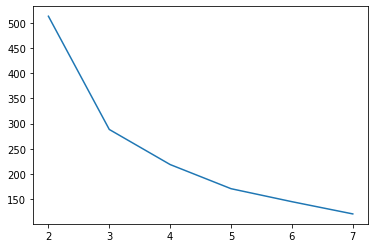

In [479]:
inertia_arr = []
for i in range (2,8):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(sk_dist_sh_df)
    temp_inertia = temp_model.inertia_
    inertia_arr.append(temp_inertia)
plt.plot([i for i in range (2,8)], inertia_arr)


In [480]:
train_df['shops_distr'] = km_distr

In [481]:

train_df = train_df.drop('Id',axis=1)



In [482]:
 train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int32  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price  

### Обзор данных


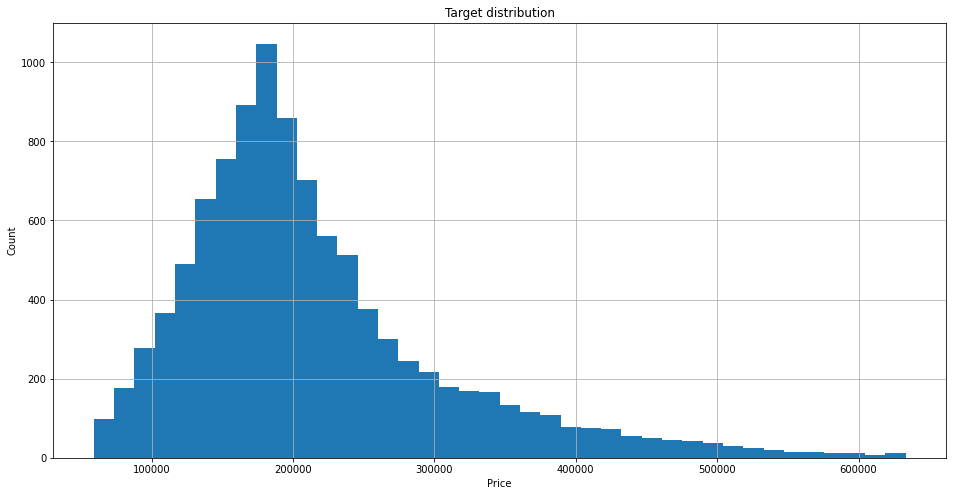

In [483]:
plt.figure (figsize=(16,8))
train_df['Price'].hist(bins = 40)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title ('Target distribution')
plt.show()

### Количественные переменные

In [484]:
train_df.describe()


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,shops_distr
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399,3.712200
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865,2.121655
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942,2.000000
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879,5.000000
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171,5.000000
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,7.000000


### Качественные переменные.

In [485]:

train_df = pd.get_dummies(train_df)


In [486]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int32  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Social_1       10000 non-null  int64  
 10  Social_2       10000 non-null  int64  
 11  Social_3       10000 non-null  int64  
 12  Healthcare_1   5202 non-null   float64
 13  Helthcare_2    10000 non-null  int64  
 14  Shops_1        10000 non-null  int64  
 15  Price          10000 non-null  float64
 16  shops_distr    10000 non-null  int32  
 17  Ecology_2_A    10000 non-null  uint8  
 18  Ecology

#### Ecology_2

In [487]:
Ecology_2_df = train_df.loc[:,'Ecology_2_A':'Ecology_2_B' ]
from sklearn.decomposition import PCA
pca = PCA(n_components =1)
pca_Ecology_2 = pca.fit_transform(Ecology_2_df)
pca_Ecology_2


array([[-0.01371787],
       [-0.01371787],
       [-0.01371787],
       ...,
       [-0.01371787],
       [-0.01371787],
       [-0.01371787]])

In [488]:
pca.explained_variance_ratio_

array([1.])

#### Ecology_3

In [489]:
# train_df['Ecology_3'] = train_df['Ecology_3'].fillna(0)
# train_df['Ecology_3'].value_counts()
# train_df = pd.get_dummies(train_df['Ecology_3'])
Ecology_3_df = train_df.loc[:,'Ecology_3_A':'Ecology_3_B' ]
from sklearn.decomposition import PCA
pca = PCA(n_components =1)
pca_Ecology_3 = pca.fit_transform(Ecology_3_df)
pca_Ecology_3



array([[-0.03889087],
       [-0.03889087],
       [-0.03889087],
       ...,
       [-0.03889087],
       [-0.03889087],
       [-0.03889087]])

In [490]:
# train_df['Shops_2'] = train_df['Shops_2'].fillna(0)
# train_df['Shops_2'].value_counts()
Shops_2_df = train_df.loc[:,'Shops_2_A':'Shops_2_B' ]
from sklearn.decomposition import PCA
pca = PCA(n_components =1)
pca_Shops_2 = pca.fit_transform(Shops_2_df)
pca_Shops_2


array([[-0.11667262],
       [-0.11667262],
       [-0.11667262],
       ...,
       [-0.11667262],
       [-0.11667262],
       [-0.11667262]])

In [491]:

# train_df['DistrictID'] = train_df['DistrictID'].fillna(0)

###  Предобработка данных


### Стандартизация признаков

In [492]:
# scaler = StandardScaler()
# train_df_scl = scaler.fit_transform(train_df)

#### District

In [493]:
# import matplotlib.pyplot as plt 

# plt.scatter(train_df['DistrictId'],train_df['Price'])

#### Rooms

In [494]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [495]:
median = train_df['Rooms'].median()
train_df.loc[train_df['Rooms'].isin ([0,10,19]),'Rooms'] = median
median_2 = train_df['Rooms'].median()
train_df.loc[train_df['Rooms']>6,'Rooms'] = median_2

In [496]:
test_df.loc[test_df['Rooms']>4,'Rooms'] = median_2

#### Square LifeSquare KitchenSquare

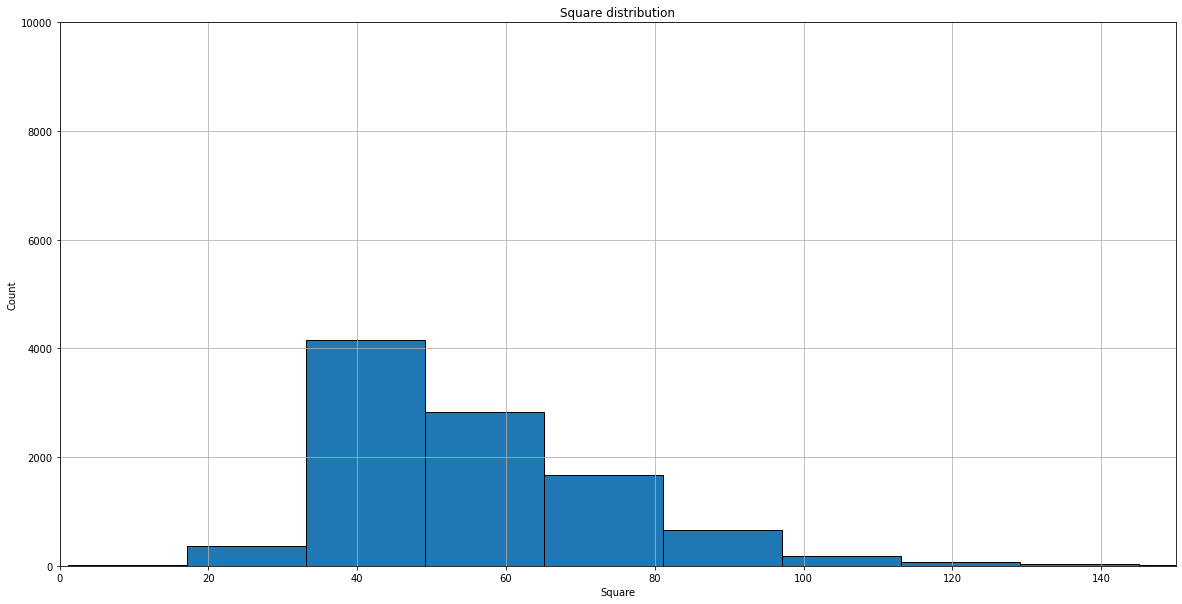

In [497]:
# train_df['Square'].value_counts()
plt.figure (figsize=(20,10))
plt.axis([0,150,0,10000])
train_df['Square'].hist(bins = 40, edgecolor = 'black')
# train_df['LifeSquare'].hist(bins = 40, edgecolor = 'black')
# train_df['KitchenSquare'].hist(bins = 40, edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Square')

plt.title ('Square distribution')
# print(hist_info)
plt.show()

По гистограмме видно, что основное количество площадей распределено в диапозоне от 25 до 120 метров.

In [498]:
train_df['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [499]:
train_df[train_df['Square']>120].shape

(92, 23)

In [500]:
train_df[train_df['Square']<25].shape

(34, 23)

In [501]:
# mode_sq = train_df['Square'].mode()
train_df.loc[train_df['Square']>100,'Square'] = 100
train_df.loc[train_df['Square']<25,'Square'] = 25

In [502]:
# train_df['Square'] = train_df.loc[(train_df['Square'] < 125)|(train_df['Square']>25)]

In [503]:
# проверяем насколько изменились значения выборки
train_df['Square'].describe()

count    10000.000000
mean        55.720169
std         17.252183
min         25.000000
25%         41.774881
50%         52.513310
75%         65.900625
max        100.000000
Name: Square, dtype: float64

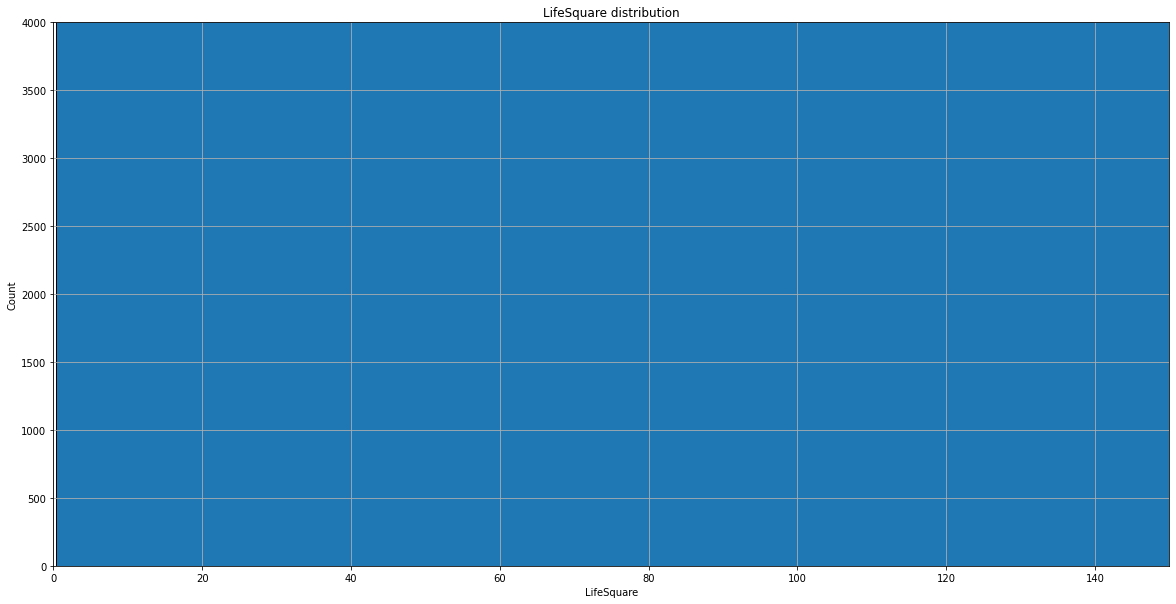

In [504]:
# LifeSquare
plt.figure (figsize=(20,10))
plt.axis([0,150,0,4000])

train_df['LifeSquare'].hist(bins = 40, edgecolor = 'black')


plt.ylabel('Count')
plt.xlabel('LifeSquare')

plt.title ('LifeSquare distribution')
# print(hist_info)
plt.show()

In [505]:

train_df['LifeSquare'].describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [506]:
mean_lsq = train_df['LifeSquare'].mean()
train_df.loc[train_df['LifeSquare'].isna(), 'LifeSquare']= 0
mean_lsq

37.199644827673154

In [507]:
train_df[train_df['LifeSquare']>80].shape

(210, 23)

In [508]:
train_df.loc[train_df['LifeSquare']>80,'LifeSquare'] = 80

In [509]:
train_df.loc[train_df['LifeSquare']== 0,'LifeSquare'] = mean_lsq


In [510]:
train_df[train_df['LifeSquare']<15].shape


(247, 23)

In [511]:
train_df.loc[train_df['LifeSquare']<15,'LifeSquare'] = 12

In [512]:
# проверяем насколько изменились значения выборки
train_df['LifeSquare'].describe()

count    10000.000000
mean        36.126559
std         13.904312
min         12.000000
25%         25.527399
50%         37.199645
75%         41.427234
max         80.000000
Name: LifeSquare, dtype: float64

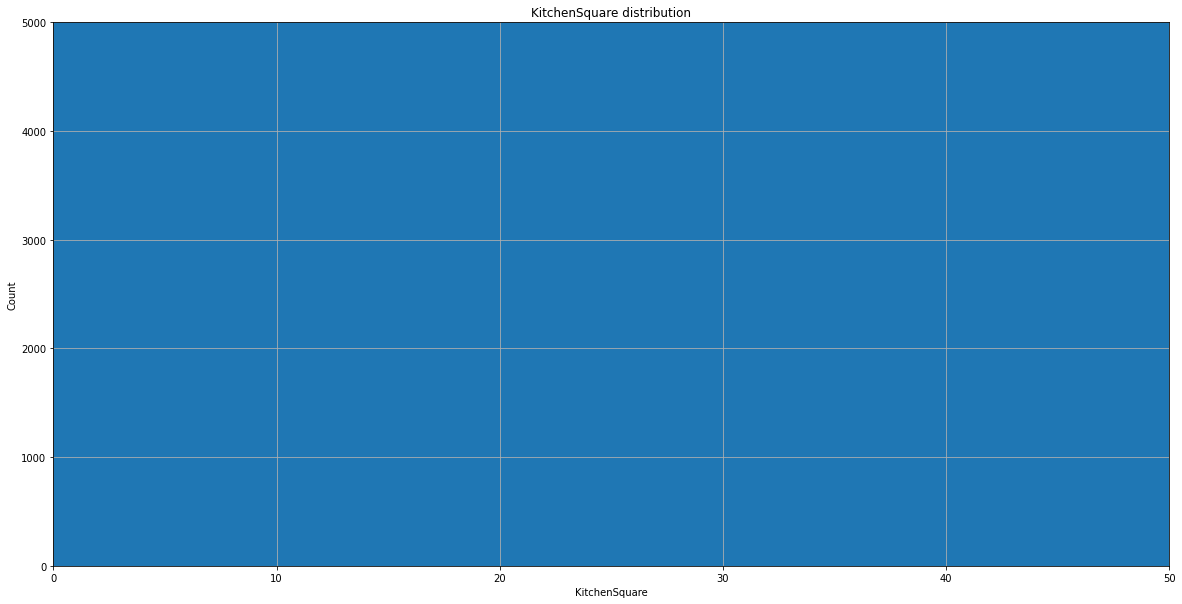

In [513]:
# KitchenSquare
plt.figure (figsize=(20,10))
plt.axis([0,50,0,5000])

train_df['KitchenSquare'].hist(bins = 40, edgecolor = 'black')


plt.ylabel('Count')
plt.xlabel('KitchenSquare')

plt.title ('KitchenSquare distribution')
# print(hist_info)
plt.show()

In [514]:
train_df['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [515]:
train_df[train_df['KitchenSquare']>20].shape

(48, 23)

In [516]:
median_ks = train_df['KitchenSquare'].median()
train_df.loc[train_df['KitchenSquare']>10,'KitchenSquare'] = median_ks 

In [517]:
# проверяем насколько изменились значения выборки
train_df['KitchenSquare'].describe()

count    10000.000000
mean         5.223900
std          3.358377
min          0.000000
25%          1.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: KitchenSquare, dtype: float64

### Floor

In [518]:
train_df['Floor'].describe()

count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64

In [519]:
median_fl = train_df['Floor'].median()
train_df.loc[train_df['Floor']== 0,'Floor'] = median_fl

In [520]:
train_df['Floor'].describe()

count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64

### HouseFloor

In [521]:
train_df['HouseFloor'].describe()

count    10000.000000
mean        12.609400
std          6.775974
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

In [522]:
median_hfl = train_df['HouseFloor'].median()
train_df.loc[train_df['HouseFloor']== 0,'HouseFloor'] = median_hfl
median_hfl

13.0

In [523]:
train_df['HouseFloor'].describe()

count    10000.00000
mean        12.95910
std          6.44346
min          1.00000
25%          9.00000
50%         13.00000
75%         17.00000
max        117.00000
Name: HouseFloor, dtype: float64

### HouseYear

In [524]:
train_df['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [525]:
median_hy = train_df['HouseYear'].median()
train_df.loc[train_df['HouseYear']== 0,'HouseYear'] =median_hy

train_df.loc[train_df['HouseYear']<1974,'HouseYear'] = median_hy
train_df.loc[train_df['HouseYear']>2001,'HouseYear'] = median_hy
median_hy

1977.0

### Social

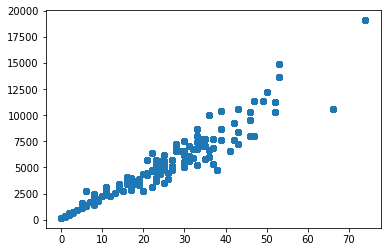

In [526]:
import matplotlib.pyplot as plt 
# plt.scatter(train_df['Social_2'],train_df['Social_2'])
# plt.scatter(train_df['Social_1'],train_df['Social_3'])
plt.scatter(train_df['Social_1'],train_df['Social_2'])

In [527]:
train_df['Social_2'].describe()

count    10000.000000
mean      5352.157400
std       4006.799803
min        168.000000
25%       1564.000000
50%       5285.000000
75%       7227.000000
max      19083.000000
Name: Social_2, dtype: float64

In [528]:
median_s_2 = train_df['Social_2'].median()
train_df.loc[train_df['Social_2']<1500,'Social_2'] =median_s_2
train_df.loc[train_df['Social_2']>8000,'Social_2'] =median_s_2

In [529]:
train_df['Social_1'].describe()

count    10000.000000
mean        24.687000
std         17.532614
min          0.000000
25%          6.000000
50%         25.000000
75%         36.000000
max         74.000000
Name: Social_1, dtype: float64

In [530]:
median_s_1 = train_df['Social_1'].median()
train_df.loc[train_df['Social_1']<6,'Social_1'] =median_s_1
train_df.loc[train_df['Social_1']>36,'Social_1'] =median_s_1

In [531]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
feats2 = ['Social_1','Social_2']
social_df = train_df [feats2]

social_df_ckld = scaler.fit_transform(social_df)

In [532]:
from sklearn.decomposition import PCA
pca = PCA(n_components =1)
pca_social = pca.fit_transform(social_df_ckld)
pca_social
# pca.explained_variance_ratio_

array([[ 2.47095526],
       [-1.15648398],
       [-1.02724361],
       ...,
       [ 0.8426549 ],
       [-0.15129684],
       [-0.15129684]])

In [533]:
train_df['PSA_social1_2'] = pca_social

In [534]:
train_df['Social_3'].describe()


count    10000.000000
mean         8.039200
std         23.831875
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max        141.000000
Name: Social_3, dtype: float64

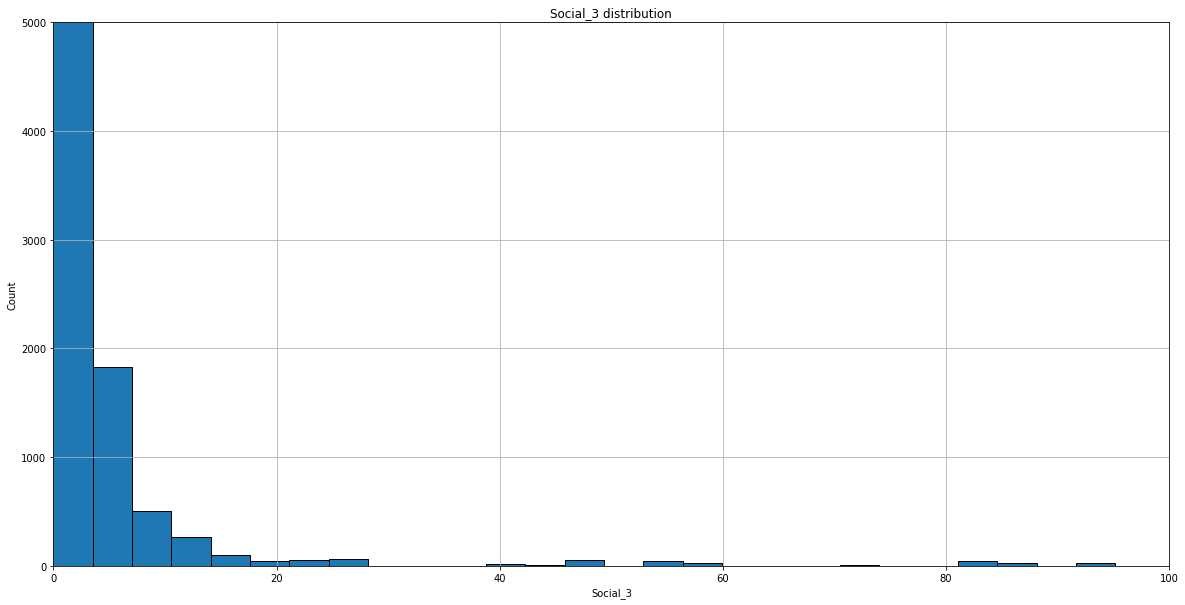

In [535]:
plt.figure (figsize=(20,10))
plt.axis([0,100,0,5000])

train_df['Social_3'].hist(bins = 40, edgecolor = 'black')


plt.ylabel('Count')
plt.xlabel('Social_3')

plt.title ('Social_3 distribution')
# print(hist_info)
plt.show()

In [536]:
median_s_3 = train_df['Social_3'].median()
# train_df.loc[train_df['Social_3']<1,'Social_3'] =median_s_3
train_df.loc[train_df['Social_3']>30,'Social_3'] =median_s_3
train_df['Social_3'].describe()

count    10000.000000
mean         2.974500
std          4.138594
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         27.000000
Name: Social_3, dtype: float64

### Healthcare

#### 1

In [537]:
train_df['Healthcare_1'] = train_df['Healthcare_1'].fillna(0)
train_df['Healthcare_1'].describe()

count    10000.000000
mean       594.538900
std        932.112976
min          0.000000
25%          0.000000
50%         30.000000
75%        990.000000
max       4849.000000
Name: Healthcare_1, dtype: float64

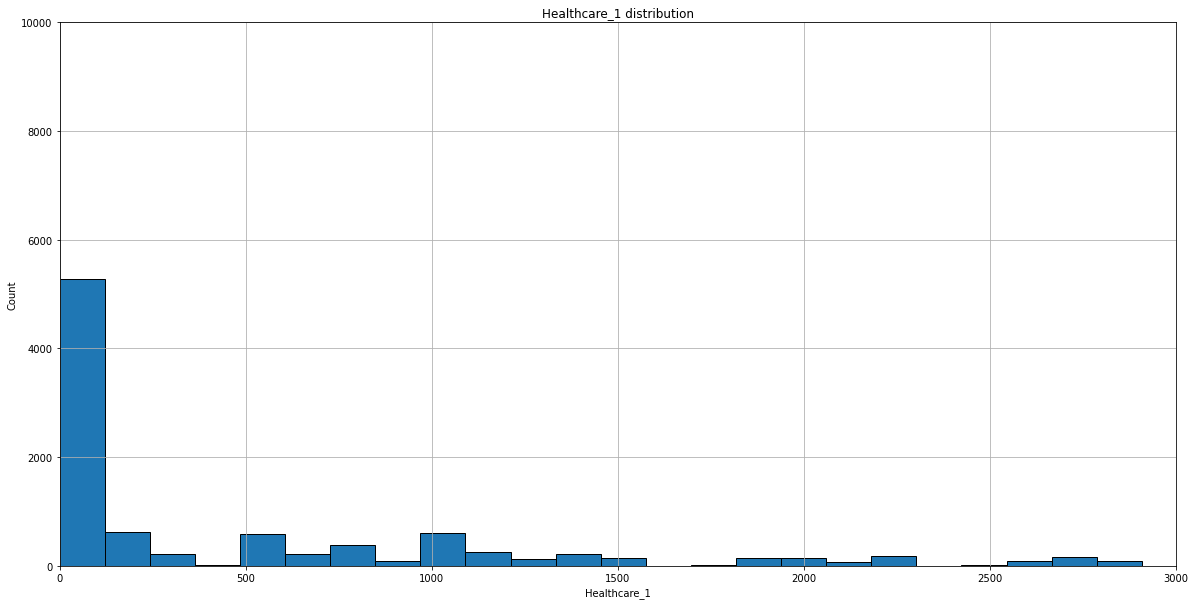

In [538]:
plt.figure (figsize=(20,10))
plt.axis([0,3000,0,10000])

train_df['Healthcare_1'].hist(bins = 40, edgecolor = 'black')


plt.ylabel('Count')
plt.xlabel('Healthcare_1')

plt.title ('Healthcare_1 distribution')
# print(hist_info)
plt.show()

In [539]:
median_HC_1 = train_df['Healthcare_1'].median()
train_df.loc[train_df['Healthcare_1']<10,'Healthcare_1'] =median_HC_1
train_df.loc[train_df['Healthcare_1']>700,'Healthcare_1'] =median_HC_1
train_df['Healthcare_1'].describe()

count    10000.00000
mean        87.34990
std        147.47335
min         30.00000
25%         30.00000
50%         30.00000
75%         30.00000
max        645.00000
Name: Healthcare_1, dtype: float64

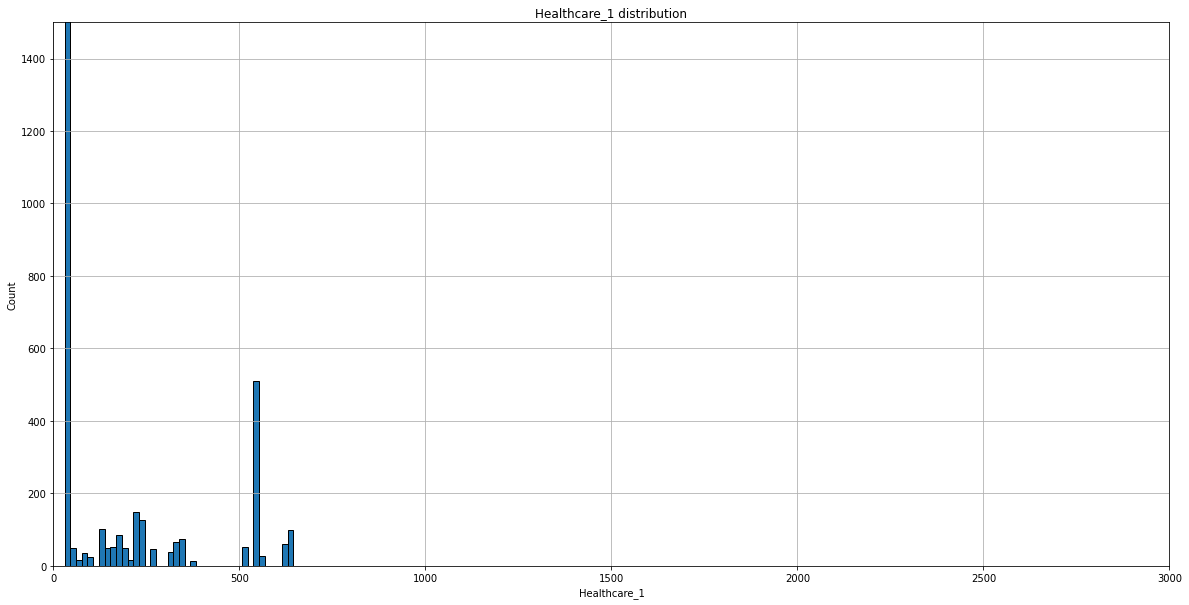

In [540]:
plt.figure (figsize=(20,10))
plt.axis([0,3000,0,1500])

train_df['Healthcare_1'].hist(bins = 40, edgecolor = 'black')


plt.ylabel('Count')
plt.xlabel('Healthcare_1')

plt.title ('Healthcare_1 distribution')
# print(hist_info)
plt.show()

#### 2

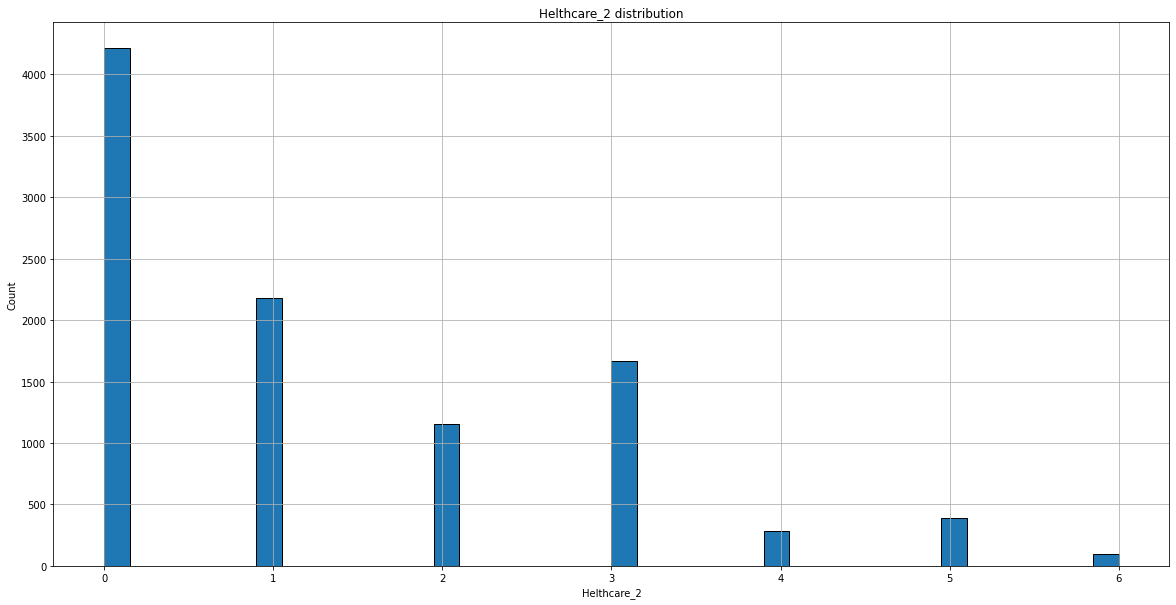

In [541]:
plt.figure (figsize=(20,10))


train_df['Helthcare_2'].hist(bins = 40, edgecolor = 'black')


plt.ylabel('Count')
plt.xlabel('Helthcare_2')

plt.title ('Helthcare_2 distribution')
# print(hist_info)
plt.show()

In [542]:
train_df['Helthcare_2'] = train_df['Helthcare_2'].fillna(0)
median_HC_2 = train_df['Helthcare_2'].median()
train_df.loc[train_df['Helthcare_2']==0,'Helthcare_2'] =median_HC_2
# train_df.loc[train_df['Helthcare_2']>3,'Helthcare_2'] =median_HC_2

In [543]:
train_df['Helthcare_2'].describe()

count    10000.000000
mean         1.740900
std          1.167263
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: Helthcare_2, dtype: float64

In [544]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int32  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Social_1       10000 non-null  int64  
 10  Social_2       10000 non-null  int64  
 11  Social_3       10000 non-null  int64  
 12  Healthcare_1   10000 non-null  float64
 13  Helthcare_2    10000 non-null  int64  
 14  Shops_1        10000 non-null  int64  
 15  Price          10000 non-null  float64
 16  shops_distr    10000 non-null  int32  
 17  Ecology_2_A    10000 non-null  uint8  
 18  Ecology

In [545]:
train_df.tail(1)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Shops_1,Price,shops_distr,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,PSA_social1_2
9999,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,25,...,9,177685.627486,7,0,1,0,1,0,1,-0.151297


### Построение модели

In [546]:
# #  0.622
feat = ['shops_distr','Rooms',	'Square',	'KitchenSquare',	'Floor',	'Ecology_1','Helthcare_2',	'PSA_social1_2',	'Ecology_2_A',	'Ecology_2_B',	'Ecology_3_A',	'Ecology_3_B',	'Shops_2_A','Shops_2_B', 'Social_2']
#  0.615 feat = ['DistrictId',  'Rooms',	'Square', 'Social_1', 'Social_2',	'Healthcare_1',	'Helthcare_2',	'Shops_1',	'Ecology_2_A',	'Ecology_2_B',	'Ecology_3_A',	'Ecology_3_B',	'Shops_2_A','Shops_2_B']
# 0.620  all feat = ['DistrictId',  'Rooms',	'Square',	'KitchenSquare',	'Floor',	'Ecology_1',	'Social_1',	'Social_2',	'Healthcare_1',	'Helthcare_2',	'Shops_1',	'Ecology_2_A',	'Ecology_2_B',	'Ecology_3_A',	'Ecology_3_B',	'Shops_2_A','Shops_2_B', 'Social_2', 'shops_distr',	'PSA_social1_2']
# feat = [ 'DistrictId','Rooms','Square',	'KitchenSquare',	'Floor',	'Ecology_1',	'Social_1',	'Social_2',	'Healthcare_1',	'Helthcare_2',	'Ecology_2_A',	'Ecology_2_B',	'Ecology_3_A',	'Ecology_3_B',	'Shops_2_A','Shops_2_B', 'Social_2', 'shops_distr',	'PSA_social1_2']
# feat = ['DistrictId',  'Rooms',	'Square',	'LifeSquare',	'KitchenSquare',	'Floor',	'HouseFloor',	'HouseYear',	'Ecology_1',	'Social_1',	'Social_2',	'Healthcare_1',	'Helthcare_2',	'Shops_1',	'Ecology_2_A',	'Ecology_2_B',	'Ecology_3_A',	'Ecology_3_B',	'Shops_2_A','Shops_2_B']
# 'Shops_2', 'Ecology_2', 'Ecology_1''DistrictId'
# feat = ['DistrictId',  'Rooms',	'Square', 'Social_1', 'Social_2',	'Healthcare_1',	'Helthcare_2',	'Shops_1']
# feat = ['DistrictId',  'Rooms',	'Square',	'KitchenSquare',	'Floor',	'Ecology_1',	'Social_1',	'Social_2',	'Healthcare_1',	'Helthcare_2',	 'shops_distr',	'PSA_social1_2']
x = train_df [feat]
y = train_df['Price']
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.3, random_state=21)

### Линейная регрессия

In [547]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [548]:
lr.fit (x_train,y_train)

LinearRegression()

In [549]:
y_pred_1 = lr.predict(x_valid)
y_pred_1

array([ 95484.55805419, 216493.69057657, 164680.88019296, ...,
       242989.62033136, 163081.18733757, 204785.96415468])

In [550]:
#check_test = pd.DataFrame({'y_valid':y_valid['Price'],y_pred_1: y_pred_1.flatten()}, columns = ['y_valid','y_pred_1'])
y_pred_tr = lr.predict(x_train)
y_pred_tr

array([296330.3044224 , 195323.15848681, 234078.67626777, ...,
       197965.09774911,  97426.05946558, 249228.08582554])

In [551]:
r2_lr = r2_score(y_pred_1, y_valid)
r2_lr


0.0016214023327992821

In [552]:
r2_lr_train = r2_score(y_pred_tr, y_train)
r2_lr_train

-0.027763359350597927

In [553]:
scaler = StandardScaler()
x_train_scl = scaler.fit_transform(x_train)
x_train_scl = pd.DataFrame(x_train_scl, columns=x_train.columns)
 

In [554]:
scaler = StandardScaler()
x_valid_scl = scaler.fit_transform(x_valid)
x_valid_scl = pd.DataFrame(x_valid_scl, columns=x_valid.columns)

In [555]:
lr.fit(x_train_scl, y_train)
y_pred_4 = lr.predict(x_valid_scl)
r2_lr = r2_score(y_pred_4, y_valid)
r2_lr

-0.053929532203586206

<BarContainer object of 15 artists>

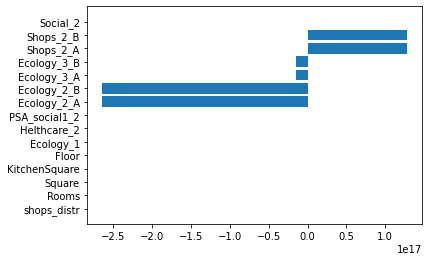

In [556]:
# проверяем и удаляем признаки с практически нулевыми весами.
plt.barh(x_train.columns, lr.coef_.flatten())

### RandomForestRegressor

In [557]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [558]:
y_pred_2 = forest.predict(x_valid)
y_pred_3 = forest.predict(x_train)

In [559]:
r2_fr_train = r2_score(y_pred_3, y_train)
r2_fr_train

0.9461662555443173

In [560]:
r2_fr = r2_score(y_pred_2, y_valid)
r2_fr

0.5887089476657295

### additionaly